In [1]:
#Script Python para Teste de Modelos de Machine Learning
#Autor: Lucas Lai Barbosa

#Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

In [2]:
#Carregamento do arquivo CSV gerado no "SCRIPT_ANALISE_DOS_DADOS"
df = pd.read_csv('CSV_PRODUTOS_LOJAS.csv', sep=',', decimal = '.', low_memory=False, encoding = 'utf8')
df

,ID_PRODUTO,DEPARTAMENTO,MATERIAL_SEGMENTO,MATERIAL_SUBSEGMENTO,MATERIAL_GRUPO,MATERIAL_SUBGRUPO,Tipo,Subtipo,Genero,Idade,...,AREA,Rua/Shopping,CLUSTER,TAMANHO_PE,Temp_loja,Cluster_low_high,TEMPO_EM_LOJA,PRECO_UNIT,QTD_PRODUTOS_VENDIDOS,VALOR_TOTAL_VENDIDO
0,5054397004,CHINELO,FEMININO,FEMININO,FEMININO,CHL FEMININO,CHINELO,CASUAL,FEMININO,ADULTO,...,884,Rua,C,GRANDE,Quente,Low,33,19.88,19,377.81
1,5054397004,CHINELO,FEMININO,FEMININO,FEMININO,CHL FEMININO,CHINELO,CASUAL,FEMININO,ADULTO,...,778,Rua,B,GRANDE,Quente,High,37,19.73,19,375.05
2,5054397004,CHINELO,FEMININO,FEMININO,FEMININO,CHL FEMININO,CHINELO,CASUAL,FEMININO,ADULTO,...,1713,Rua,A,GRANDE,Quente,Low,32,19.72,23,453.77
3,5054397004,CHINELO,FEMININO,FEMININO,FEMININO,CHL FEMININO,CHINELO,CASUAL,FEMININO,ADULTO,...,1345,Rua,A,GRANDE,Quente,High,36,19.59,10,195.90
4,5054397004,CHINELO,FEMININO,FEMININO,FEMININO,CHL FEMININO,CHINELO,CASUAL,FEMININO,ADULTO,...,1125,Rua,A,GRANDE,Quente,Low,96,19.99,25,499.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114825,5170464041,TENIS ESPORTIVO,MASCULINO,TREINO,TREINO,TNS MASC TREINO,TENIS,TREINO,MASCULINO,ADULTO,...,1309,Shopping,A,PEQUENO,Quente,High,97,240.20,11,2642.22
114826,5170464041,TENIS ESPORTIVO,MASCULINO,TREINO,TREINO,TNS MASC TREINO,TENIS,TREINO,MASCULINO,ADULTO,...,1197,Shopping,A,GRANDE,Fria,High,98,227.55,14,3185.80
114827,5170464041,TENIS ESPORTIVO,MASCULINO,TREINO,TREINO,TNS MASC TREINO,TENIS,TREINO,MASCULINO,ADULTO,...,1978,Rua,B,GRANDE,Fria,Low,89,259.77,10,2597.71
114828,5170464041,TENIS ESPORTIVO,MASCULINO,TREINO,TREINO,TNS MASC TREINO,TENIS,TREINO,MASCULINO,ADULTO,...,1144,Shopping,B,GRANDE,Quente,Low,124,243.03,11,2673.42


In [3]:
#Exclusão das colunas irrelevantes
df2 = df.drop(columns=["ID_LOJA","ID_PRODUTO","DEPARTAMENTO","MATERIAL_SEGMENTO","MATERIAL_SUBSEGMENTO","MATERIAL_GRUPO",\
                       "MATERIAL_SUBGRUPO","MATERIAL_COR","CIDADE","UF","QTD_PRODUTOS_VENDIDOS"])

In [4]:
#Transformação das colunas categóricas binárias e categóricas ordinais em valores numéricos

cat_gen = ["MASCULINO","FEMININO"]
cat_idade = ["BEBE", "INFANTIL", "JUVENIL", "ADULTO"]
cat_marca = ["TERCEIRO", "PROPRIA"]
cat_local = ["Rua","Shopping"]
cat_pe = ["PEQUENO","GRANDE"]
cat_clima = ["Fria","Quente"]
cat_hl = ["Low","High"]
cat_cluster = ["C","B","A"]
oe1 = OrdinalEncoder(categories=[cat_gen, cat_idade, cat_marca, cat_local, cat_pe, cat_clima, cat_hl, cat_cluster])
df2[["Genero", "Idade", "MATERIAL_MARCA", "Rua/Shopping","TAMANHO_PE","Temp_loja","Cluster_low_high", "CLUSTER"]] = \
    oe1.fit_transform(df2[["Genero", "Idade", "MATERIAL_MARCA", "Rua/Shopping","TAMANHO_PE","Temp_loja","Cluster_low_high", "CLUSTER"]])
df2

,Tipo,Subtipo,Genero,Idade,COR_H,COR_S,COR_B,MATERIAL_MARCA,REGIAO,POPULACAO,ANOS_DESDE_INAUG,AREA,Rua/Shopping,CLUSTER,TAMANHO_PE,Temp_loja,Cluster_low_high,TEMPO_EM_LOJA,PRECO_UNIT,VALOR_TOTAL_VENDIDO
0,CHINELO,CASUAL,1.0,3.0,51.0,1.0,1.0,0.0,Centro-Oeste,623614,39.0,884,0.0,0.0,1.0,1.0,0.0,33,19.88,377.81
1,CHINELO,CASUAL,1.0,3.0,51.0,1.0,1.0,0.0,Centro-Oeste,623614,24.0,778,0.0,1.0,1.0,1.0,1.0,37,19.73,375.05
2,CHINELO,CASUAL,1.0,3.0,51.0,1.0,1.0,0.0,Centro-Oeste,290383,11.0,1713,0.0,2.0,1.0,1.0,0.0,32,19.72,453.77
3,CHINELO,CASUAL,1.0,3.0,51.0,1.0,1.0,0.0,Centro-Oeste,916001,21.0,1345,0.0,2.0,1.0,1.0,1.0,36,19.59,195.90
4,CHINELO,CASUAL,1.0,3.0,51.0,1.0,1.0,0.0,Centro-Oeste,623614,21.0,1125,0.0,2.0,1.0,1.0,0.0,96,19.99,499.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114825,TENIS,TREINO,0.0,3.0,0.0,0.0,0.0,0.0,Norte,548952,13.0,1309,1.0,2.0,0.0,1.0,1.0,97,240.20,2642.22
114826,TENIS,TREINO,0.0,3.0,0.0,0.0,0.0,0.0,Sul,366418,11.0,1197,1.0,2.0,1.0,0.0,1.0,98,227.55,3185.80
114827,TENIS,TREINO,0.0,3.0,0.0,0.0,0.0,0.0,Sul,140597,10.0,1978,0.0,1.0,1.0,0.0,0.0,89,259.77,2597.71
114828,TENIS,TREINO,0.0,3.0,0.0,0.0,0.0,0.0,Norte,419452,8.0,1144,1.0,1.0,1.0,1.0,0.0,124,243.03,2673.42


In [5]:
#Transformação das colunas categóricas nominais em colunas binárias (uma para cata categoria)
pd.set_option('display.max_columns', None)
X = pd.get_dummies(df2.iloc[:,0:-1])

y = df2.iloc[:,-1]

In [6]:
#Divisão da base em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=23, test_size=0.20)

In [7]:
#Transformação das escalas das colunas da base de treino em valores entre 0 e 1
scaler = MinMaxScaler()

colunas_scale = ["Idade", "COR_H", "POPULACAO", "ANOS_DESDE_INAUG","AREA","CLUSTER","TEMPO_EM_LOJA","PRECO_UNIT"]
X_train_sc = X_train.copy()
X_train_sc[colunas_scale] = scaler.fit_transform(X_train_sc[colunas_scale])
X_train_sc.describe()

,Genero,Idade,COR_H,COR_S,COR_B,MATERIAL_MARCA,POPULACAO,ANOS_DESDE_INAUG,AREA,Rua/Shopping,CLUSTER,TAMANHO_PE,Temp_loja,Cluster_low_high,TEMPO_EM_LOJA,PRECO_UNIT,Tipo_BOTA,Tipo_CHINELO,Tipo_SANDALIA,Tipo_SAPATENIS,Tipo_SAPATO,Tipo_TAMANCO,Tipo_TENIS,Subtipo_ALTO,Subtipo_BAIXO,Subtipo_CASUAL,Subtipo_COTURNO,Subtipo_MEDIO,Subtipo_PRAIA,Subtipo_RASTEIRO,Subtipo_SAPATILHA,Subtipo_SOCIAL,Subtipo_TREINO,REGIAO_Centro-Oeste,REGIAO_Nordeste,REGIAO_Norte,REGIAO_Sul
count,91864.000000,91864.000000,91864.000000,91864.000000,91864.000000,91864.000000,91864.000000,91864.000000,91864.000000,91864.000000,91864.000000,91864.000000,91864.000000,91864.000000,91864.000000,91864.000000,91864.000000,91864.000000,91864.000000,91864.000000,91864.000000,91864.000000,91864.000000,91864.000000,91864.000000,91864.000000,91864.000000,91864.000000,91864.000000,91864.000000,91864.000000,91864.000000,91864.000000,91864.000000,91864.000000,91864.000000,91864.000000
mean,0.758828,0.930539,0.201964,0.266829,0.518759,0.585420,0.290449,0.219146,0.411249,0.639554,0.626317,0.616357,0.764293,0.587640,0.608475,0.180351,0.039025,0.249684,0.136278,0.015425,0.150897,0.192709,0.215982,0.052121,0.029783,0.401724,0.032243,0.035476,0.050009,0.232975,0.065194,0.017580,0.082894,0.246364,0.184098,0.341494,0.228044
std,0.427797,0.222711,0.331063,0.386714,0.449645,0.492652,0.282183,0.162362,0.181823,0.480132,0.389481,0.486275,0.424442,0.492262,0.236318,0.129598,0.193656,0.432833,0.343085,0.123236,0.357950,0.394428,0.411504,0.222271,0.169990,0.490249,0.176647,0.184982,0.217964,0.422729,0.246870,0.131421,0.275724,0.430895,0.387566,0.474213,0.419573
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.075455,0.102564,0.291091,0.000000,0.500000,0.000000,1.000000,0.000000,0.428144,0.084024,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.020000,0.550000,1.000000,0.179976,0.179487,0.366359,1.000000,0.500000,1.000000,1.000000,1.000000,0.637725,0.141642,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.171429,0.530000,1.000000,1.000000,0.515646,0.307692,0.528418,1.000000,1.000000,1.000000,1.000000,1.000000,0.808383,0.253831,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
#Transformação das escalas da base de teste na mesma escala da base de treino
X_test_sc = X_test.copy()
X_test_sc[colunas_scale] = scaler.transform(X_test_sc[colunas_scale])
X_test_sc.describe()

,Genero,Idade,COR_H,COR_S,COR_B,MATERIAL_MARCA,POPULACAO,ANOS_DESDE_INAUG,AREA,Rua/Shopping,CLUSTER,TAMANHO_PE,Temp_loja,Cluster_low_high,TEMPO_EM_LOJA,PRECO_UNIT,Tipo_BOTA,Tipo_CHINELO,Tipo_SANDALIA,Tipo_SAPATENIS,Tipo_SAPATO,Tipo_TAMANCO,Tipo_TENIS,Subtipo_ALTO,Subtipo_BAIXO,Subtipo_CASUAL,Subtipo_COTURNO,Subtipo_MEDIO,Subtipo_PRAIA,Subtipo_RASTEIRO,Subtipo_SAPATILHA,Subtipo_SOCIAL,Subtipo_TREINO,REGIAO_Centro-Oeste,REGIAO_Nordeste,REGIAO_Norte,REGIAO_Sul
count,22966.000000,22966.000000,22966.000000,22966.000000,22966.000000,22966.000000,22966.000000,22966.000000,22966.000000,22966.000000,22966.000000,22966.000000,22966.000000,22966.000000,22966.000000,22966.000000,22966.000000,22966.000000,22966.000000,22966.000000,22966.000000,22966.000000,22966.000000,22966.000000,22966.000000,22966.000000,22966.000000,22966.000000,22966.000000,22966.000000,22966.000000,22966.000000,22966.000000,22966.000000,22966.000000,22966.000000,22966.000000
mean,0.756292,0.930767,0.199234,0.269823,0.517763,0.582731,0.289018,0.218865,0.412330,0.635243,0.629670,0.623443,0.759209,0.587782,0.609534,0.179265,0.038100,0.253941,0.132195,0.015458,0.153749,0.188714,0.217844,0.049682,0.029478,0.407951,0.030741,0.034094,0.050379,0.231124,0.065619,0.017896,0.083036,0.247888,0.182182,0.338152,0.231777
std,0.429328,0.222055,0.326993,0.389674,0.450177,0.493119,0.281666,0.161104,0.182004,0.481372,0.389769,0.484533,0.427573,0.492245,0.233110,0.129535,0.191441,0.435274,0.338710,0.123367,0.360716,0.391290,0.412790,0.217292,0.169147,0.491465,0.172619,0.181474,0.218730,0.421561,0.247620,0.132576,0.275942,0.431796,0.386003,0.473091,0.421977
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001947,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.075455,0.102564,0.289555,0.000000,0.500000,0.000000,1.000000,0.000000,0.434132,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.020000,0.550000,1.000000,0.171676,0.179487,0.366359,1.000000,0.500000,1.000000,1.000000,1.000000,0.640719,0.140338,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.171429,0.530000,1.000000,1.000000,0.515646,0.307692,0.528418,1.000000,1.000000,1.000000,1.000000,1.000000,0.802395,0.252598,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.007410,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
#Teste com Regressão Linear Múltipla

linreg = LinearRegression().fit(X_train_sc, y_train)

#Validação cruzada com base de treino
print('--- Reg. Linear - Validação Cruzada com base de treino ---')
cv_r2_linreg = cross_val_score(linreg, X_train_sc, y_train, cv=5, scoring='r2')
print("R2 Médio da Validação Cruzada: {:.4f}".format(cv_r2_linreg.mean()))

cv_mse_linreg = cross_val_score(linreg, X_train_sc, y_train, cv=5, scoring='neg_mean_absolute_error')
print("MAE Médio da Validação Cruzada: {:.4f}".format(-cv_mse_linreg.mean()))

#Validação do modelo
print('\n--- Reg. Linear - Validação do Modelo ---')
print("R2 na base de treinamento: {:.4f}".format(linreg.score(X_train_sc, y_train)))
print("R2 na base de teste: {:.4f}".format(linreg.score(X_test_sc, y_test)))

y_predicted_linreg = linreg.predict(X_train_sc)
print("\nMAE na base de treinamento: {:.4f}".format(mean_absolute_error(y_train, y_predicted_linreg)))
y_predicted_test_linreg = linreg.predict(X_test_sc)
print("MAE na base de teste: {:.4f}".format(mean_absolute_error(y_test, y_predicted_test_linreg)))

--- Reg. Linear - Validação Cruzada com base de treino ---
R2 Médio da Validação Cruzada: 0.6288
MAE Médio da Validação Cruzada: 297.7803

--- Reg. Linear - Validação do Modelo ---
R2 na base de treinamento: 0.6291
R2 na base de teste: 0.6253

MAE na base de treinamento: 297.5644
MAE na base de teste: 298.3612


In [10]:
# Teste com Regressão Ridge

#Ajuste de Hiperparâmetros com Grid Search
param_var = {'alpha': [0.01, 0.1, 1, 10, 100]}
rid = GridSearchCV(estimator=Ridge(), param_grid=param_var, scoring='r2', cv=5, refit=True)
rid.fit(X_train_sc, y_train)
print('--- Ridge - GridSearch ---')
print('Melhor Hiperparâmetro: '+str(rid.best_params_))
print("R2 do melhor estimador: {:.4f}".format(rid.best_score_))

#Validação do modelo
print('\n--- Ridge - Validação do Modelo ---')
print("R2 na base de treinamento: {:.4f}".format(rid.score(X_train_sc, y_train)))
print("R2 na base de teste: {:.4f}".format(rid.score(X_test_sc, y_test)))

y_predicted_rid = rid.predict(X_train_sc)
print("\nMAE na base de treinamento: {:.4f}".format(mean_absolute_error(y_train, y_predicted_rid)))
y_predicted_test_rid = rid.predict(X_test_sc)
print("MAE na base de teste: {:.4f}".format(mean_absolute_error(y_test, y_predicted_test_rid)))

--- Ridge - GridSearch ---
Melhor Hiperparâmetro: {'alpha': 0.1}
R2 do melhor estimador: 0.6289

--- Ridge - Validação do Modelo ---
R2 na base de treinamento: 0.6291
R2 na base de teste: 0.6253

MAE na base de treinamento: 297.5615
MAE na base de teste: 298.3588


In [11]:
#Teste com Regressão Lasso

#Ajuste de Hiperparâmetros com Grid Search
param_var = {'alpha': [0.1, 1, 10, 100]}
las = GridSearchCV(estimator=Lasso(), param_grid=param_var, scoring='r2', cv=5, refit=True)
las.fit(X_train_sc, y_train)
print('--- Lasso - GridSearch ---')
print('Melhor Hiperparâmetro: '+str(las.best_params_))
print("R2 do melhor estimador: {:.4f}".format(las.best_score_))

#Validação do modelo
print('\n--- Lasso - Validação do Modelo ---')
print("R2 na base de treinamento: {:.4f}".format(las.score(X_train_sc, y_train)))
print("R2 na base de teste: {:.4f}".format(las.score(X_test_sc, y_test)))

y_predicted_las = las.predict(X_train_sc)
print("\nMAE na base de treinamento: {:.4f}".format(mean_absolute_error(y_train, y_predicted_las)))
y_predicted_test_las = las.predict(X_test_sc)
print("MAE na base de teste: {:.4f}".format(mean_absolute_error(y_test, y_predicted_test_las)))

--- Lasso - GridSearch ---
Melhor Hiperparâmetro: {'alpha': 0.1}
R2 do melhor estimador: 0.6288

--- Lasso - Validação do Modelo ---
R2 na base de treinamento: 0.6291
R2 na base de teste: 0.6253

MAE na base de treinamento: 297.3416
MAE na base de teste: 298.1085


In [12]:
#Teste com K-NN Regressor

#Ajuste de Hiperparâmetros com Random Search
param_var = {'n_neighbors': [4, 8, 12, 16], 'p':[1, 2]}
knn = RandomizedSearchCV(estimator=KNeighborsRegressor(), param_distributions=param_var, scoring='r2', cv=3, refit=True,\
                         n_iter=5, random_state=23)
knn.fit(X_train_sc, y_train)
print('--- K-NN - RandomSearch ---')
print('Melhores Hiperparâmetros: '+str(knn.best_params_))
print("R2 do melhor estimador: {:.4f}".format(knn.best_score_))

#Validação do modelo
score_train_knn = knn.score(X_train_sc, y_train)
score_test_knn = knn.score(X_test_sc, y_test)
print('\n--- K-NN - Validação do Modelo ---')
print("R2 na base de treinamento: {:.4f}".format(score_train_knn))
print("R2 na base de teste: {:.4f}".format(score_test_knn))

y_predicted_knn = knn.predict(X_train_sc)
print("\nMAE na base de treinamento: {:.4f}".format(mean_absolute_error(y_train, y_predicted_knn)))
y_predicted_test_knn = knn.predict(X_test_sc)
print("MAE na base de teste: {:.4f}".format(mean_absolute_error(y_test, y_predicted_test_knn)))

--- K-NN - RandomSearch ---
Melhores Hiperparâmetros: {'p': 1, 'n_neighbors': 8}
R2 do melhor estimador: 0.6259

--- K-NN - Validação do Modelo ---
R2 na base de treinamento: 0.7305
R2 na base de teste: 0.6464

MAE na base de treinamento: 264.3031
MAE na base de teste: 303.6376


In [13]:
#Teste com Decision Tree Regressor

#Ajuste de Hiperparâmetros com Grid Search
param_var = {'min_samples_split': [2, 20, 40, 80, 120, 160], 'min_samples_leaf': [1, 10, 20, 40, 60]}
dtr = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=param_var, scoring='r2', cv=5, refit=True)
dtr.fit(X_train_sc, y_train)
print('--- Árvore de Decisão - GridSearch ---')
print('Melhores Hiperparâmetros: '+str(dtr.best_params_))
print("R2 do melhor estimador: {:.4f}".format(dtr.best_score_))

--- Árvore de Decisão - GridSearch ---
Melhores Hiperparâmetros: {'min_samples_leaf': 20, 'min_samples_split': 120}
R2 do melhor estimador: 0.7007


In [14]:
#Decision Tree Regressor - Validação do modelo
print('--- Árvore de Decisão - Validação do Modelo ---')
print("R2 na base de treinamento: {:.4f}".format(dtr.score(X_train_sc, y_train)))
print("R2 na base de teste: {:.4f}".format(dtr.score(X_test_sc, y_test)))

y_predicted_dtr = dtr.predict(X_train_sc)
print("\nMAE na base de treinamento: {:.4f}".format(mean_absolute_error(y_train, y_predicted_dtr)))
y_predicted_test_dtr = dtr.predict(X_test_sc)
print("MAE na base de teste: {:.4f}".format(mean_absolute_error(y_test, y_predicted_test_dtr)))

--- Árvore de Decisão - Validação do Modelo ---
R2 na base de treinamento: 0.7394
R2 na base de teste: 0.7029

MAE na base de treinamento: 246.7782
MAE na base de teste: 265.1887


In [15]:
#Teste com Random Forest Regressor

#Ajuste de Hiperparâmetros com Random Search
param_var = {'min_samples_split':[20, 40, 80, 120], 'n_estimators':[10, 50, 100], 'min_samples_leaf': [1, 10, 20]}
rfr = RandomizedSearchCV(estimator=RandomForestRegressor(), param_distributions=param_var, scoring='r2', cv=3, refit=True,\
                         n_iter=5, random_state=23)
rfr.fit(X_train_sc, y_train)
print('--- Random Forest - RandomSearch ---')
print('Melhores Hiperparâmetros: '+str(rfr.best_params_))
print("R2 do melhor estimador: {:.4f}".format(rfr.best_score_))

--- Random Forest - RandomSearch ---
Melhores Hiperparâmetros: {'n_estimators': 100, 'min_samples_split': 20, 'min_samples_leaf': 10}
R2 do melhor estimador: 0.7374


In [16]:
#Random Forest Regressor - Validação do modelo
print('--- Random Forest - Validação do Modelo ---')
print("R2 na base de treinamento: {:.4f}".format(rfr.score(X_train_sc, y_train)))
print("R2 na base de teste: {:.4f}".format(rfr.score(X_test_sc, y_test)))

y_predicted_rfr = rfr.predict(X_train_sc)
print("\nMAE na base de treinamento: {:.4f}".format(mean_absolute_error(y_train, y_predicted_rfr)))
y_predicted_test_rfr = rfr.predict(X_test_sc)
print("MAE na base de teste: {:.4f}".format(mean_absolute_error(y_test, y_predicted_test_rfr)))

--- Random Forest - Validação do Modelo ---
R2 na base de treinamento: 0.8199
R2 na base de teste: 0.7451

MAE na base de treinamento: 204.9909
MAE na base de teste: 248.1406


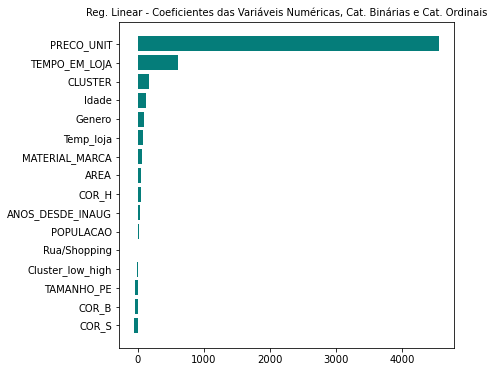

COEFICIENTES DAS VARIÁVEIS - REGRESSÃO LINEAR
PRECO_UNIT: 4556
TEMPO_EM_LOJA: 607
CLUSTER: 167
Idade: 132
Genero: 100
Temp_loja: 82
MATERIAL_MARCA: 67
AREA: 60
COR_H: 48
ANOS_DESDE_INAUG: 36
POPULACAO: 23
Rua/Shopping: 6
Cluster_low_high: -6
TAMANHO_PE: -32
COR_B: -34
COR_S: -47


In [18]:
#Importância das variáveis na Regressão Linear
importancia_lr = pd.DataFrame(data={'Variável': X_train.columns[:16],'Importância': linreg.coef_[:16]})
importancia_lr.sort_values(by=['Importância'], inplace=True, ignore_index=True)

#Gráfico dos coeficientes
fig = plt.figure(figsize=(6, 6))
fig.add_subplot(111)
plt.barh(y=importancia_lr['Variável'], width=importancia_lr['Importância'], color='#057D7A')
plt.title('Reg. Linear - Coeficientes das Variáveis Numéricas, Cat. Binárias e Cat. Ordinais', size=10)
plt.show()

#Valores dos coeficientes das colunas numéricas, categóricas binárias e categóricas ordinais
print('COEFICIENTES DAS VARIÁVEIS - REGRESSÃO LINEAR')
for i in range(15,-1,-1):
    print(importancia_lr['Variável'][i]+': %.0f' % (importancia_lr['Importância'][i]))

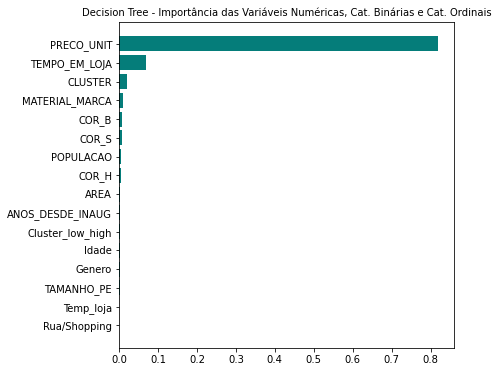

SCORES DAS VARIÁVEIS - ÁRVORE DE DECISÃO
PRECO_UNIT: 0.819
TEMPO_EM_LOJA: 0.069
CLUSTER: 0.019
MATERIAL_MARCA: 0.011
COR_B: 0.008
COR_S: 0.006
POPULACAO: 0.004
COR_H: 0.004
AREA: 0.003
ANOS_DESDE_INAUG: 0.002
Cluster_low_high: 0.002
Idade: 0.001
Genero: 0.001
TAMANHO_PE: 0.001
Temp_loja: 0.000
Rua/Shopping: 0.000


In [19]:
#Importância das variáveis na Árvore de Decisão - Feature Importance
dtr2 = DecisionTreeRegressor(random_state=23, min_samples_split = 120, min_samples_leaf = 20)
dtr2.fit(X_train_sc, y_train)

importancia_dt = pd.DataFrame(data={'Variável': X_train.columns[:16],'Importância': dtr2.feature_importances_[:16]})
importancia_dt.sort_values(by=['Importância'], inplace=True, ignore_index=True)

#Gráfico dos scores de importância
fig = plt.figure(figsize=(6, 6))
fig.add_subplot(111)
plt.barh(y=importancia_dt['Variável'], width=importancia_dt['Importância'], color='#057D7A')
plt.title('Decision Tree - Importância das Variáveis Numéricas, Cat. Binárias e Cat. Ordinais', size=10)
plt.show()

#Valores dos scores das colunas numéricas, categóricas binárias e categóricas ordinais
print('SCORES DAS VARIÁVEIS - ÁRVORE DE DECISÃO')
for i in range(15,-1,-1):
    print(importancia_dt['Variável'][i]+': %.3f' % (importancia_dt['Importância'][i]))

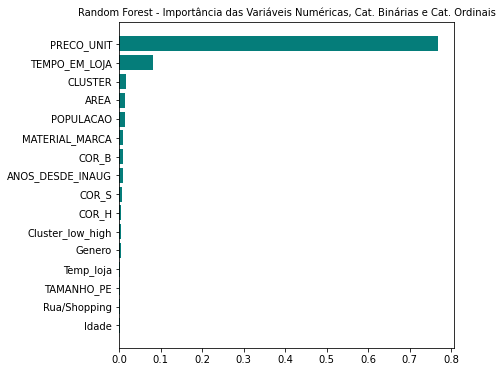

SCORES DAS VARIÁVEIS - RANDOM FOREST
PRECO_UNIT: 0.768
TEMPO_EM_LOJA: 0.082
CLUSTER: 0.017
AREA: 0.014
POPULACAO: 0.014
MATERIAL_MARCA: 0.009
COR_B: 0.009
ANOS_DESDE_INAUG: 0.008
COR_S: 0.008
COR_H: 0.005
Cluster_low_high: 0.004
Genero: 0.003
Temp_loja: 0.003
TAMANHO_PE: 0.002
Rua/Shopping: 0.002
Idade: 0.001


In [20]:
#Importância das variáveis no Random Forest Regressor
rfr2 = RandomForestRegressor(random_state=23, n_estimators=100, min_samples_split=20, min_samples_leaf=10)
rfr2.fit(X_train_sc, y_train)

importancia_rf = pd.DataFrame(data={'Variável': X_train.columns[:16],'Importância': rfr2.feature_importances_[:16]})
importancia_rf.sort_values(by=['Importância'], inplace=True, ignore_index=True)

#Gráfico dos scores de importância
fig = plt.figure(figsize=(6, 6))
fig.add_subplot(111)
plt.barh(y=importancia_rf['Variável'], width=importancia_rf['Importância'], color='#057D7A')
plt.title('Random Forest - Importância das Variáveis Numéricas, Cat. Binárias e Cat. Ordinais', size=10)
plt.show()

#Valores dos scores das colunas numéricas, categóricas binárias e categóricas ordinais
print('SCORES DAS VARIÁVEIS - RANDOM FOREST')
for i in range(15,-1,-1):
    print(importancia_rf['Variável'][i]+': %.3f' % (importancia_rf['Importância'][i]))

In [21]:
#Importância das variáveis no K-NN - Permutation Importance
knn2 = KNeighborsRegressor(n_neighbors=8, p=1)
knn2.fit(X_train_sc, y_train)

perm_import = permutation_importance(knn2, X_test_sc, y_test, n_repeats=3, random_state=23)
index_classif = perm_import.importances_mean.argsort()

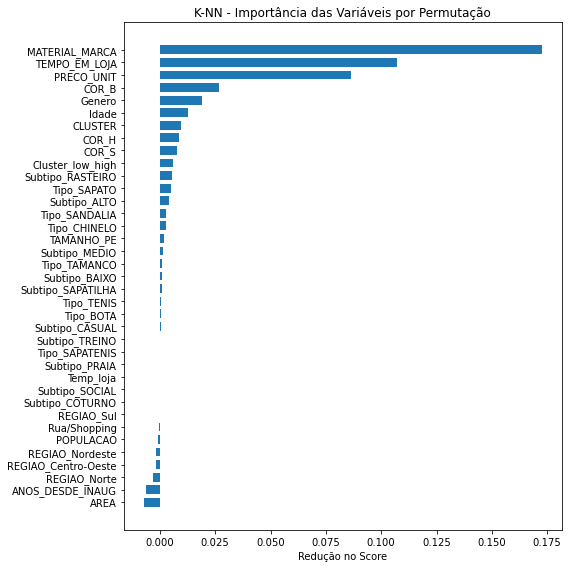

In [22]:
fig, ax1 = plt.subplots(1, figsize=(8, 8))
ax1.barh(X_test_sc.columns[index_classif], perm_import.importances_mean[index_classif], height=0.7)
ax1.set_title("K-NN - Importância das Variáveis por Permutação")
ax1.set_xlabel("Redução no Score")
ax1.figure.tight_layout()

plt.show()

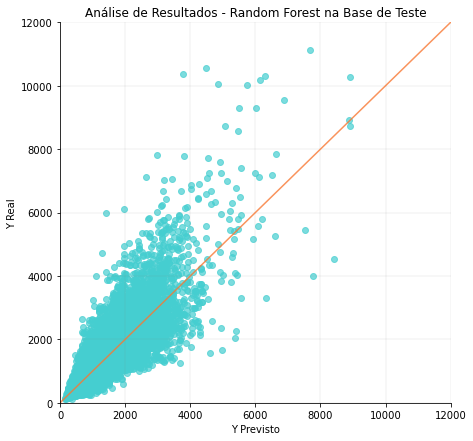

In [23]:
#Random Forest - Gráfico comparando y previsto com y real
fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(y_predicted_test_rfr, y_test, alpha=0.7, color='#45ced0')

#Adição de título nomes dos eixos
ax.set_xlabel('Y Previsto')
ax.set_ylabel('Y Real')
ax.set_title('Análise de Resultados - Random Forest na Base de Teste')

#Ajuste da escala dos eixos
ax.set_xlim(xmin=0, xmax=12000)
ax.set_ylim(ymin=0, ymax=12000)

#Remoção das barras superior e direita
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#Adição de gridlines
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

#Adição de linha de referência
plt.plot([0, 15000], [0, 15000], alpha=0.8, color='#f87833')

plt.show()

In [24]:
#Carregamento dos dados fictícios para simulação
df_sim = pd.read_excel('BD_SIMULACAO.xlsx')
df_sim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Produto_Desc         40 non-null     object 
 1   Loja_Desc            40 non-null     object 
 2   Genero               40 non-null     int64  
 3   Idade                40 non-null     int64  
 4   COR_H                40 non-null     int64  
 5   COR_S                40 non-null     float64
 6   COR_B                40 non-null     int64  
 7   MATERIAL_MARCA       40 non-null     int64  
 8   POPULACAO            40 non-null     int64  
 9   ANOS_DESDE_INAUG     40 non-null     int64  
 10  AREA                 40 non-null     int64  
 11  Rua/Shopping         40 non-null     int64  
 12  CLUSTER              40 non-null     int64  
 13  TAMANHO_PE           40 non-null     int64  
 14  Temp_loja            40 non-null     int64  
 15  Cluster_low_high     40 non-null     int64

In [25]:
#Transformação das escalas das colunas da base de simulação em valores entre 0 e 1
X_sim = df_sim.copy()
X_sim[colunas_scale] = scaler.transform(X_sim[colunas_scale])
X_sim.describe()

,Genero,Idade,COR_H,COR_S,COR_B,MATERIAL_MARCA,POPULACAO,ANOS_DESDE_INAUG,AREA,Rua/Shopping,CLUSTER,TAMANHO_PE,Temp_loja,Cluster_low_high,TEMPO_EM_LOJA,PRECO_UNIT,Tipo_BOTA,Tipo_CHINELO,Tipo_SANDALIA,Tipo_SAPATENIS,Tipo_SAPATO,Tipo_TAMANCO,Tipo_TENIS,Subtipo_ALTO,Subtipo_BAIXO,Subtipo_CASUAL,Subtipo_COTURNO,Subtipo_MEDIO,Subtipo_PRAIA,Subtipo_RASTEIRO,Subtipo_SAPATILHA,Subtipo_SOCIAL,Subtipo_TREINO,REGIAO_Centro-Oeste,REGIAO_Nordeste,REGIAO_Norte,REGIAO_Sul
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.00000,40.000000,40.00000,40.000000,40.00000,4.000000e+01,40.000000,40.000000,40.000000,40.000000,40.0,40.000000,40.0,40.000000,40.0,40.0,40.000000,40.000000,40.0,40.0,40.000000,40.0,40.0,40.000000,40.000000,40.000000,40.000000,40.000000
mean,0.600000,0.733333,0.337143,0.250000,0.600000,0.600000,0.293254,0.163462,0.395449,0.50000,0.500000,0.50000,0.750000,0.62500,4.491018e-01,0.350885,0.200000,0.200000,0.200000,0.0,0.200000,0.0,0.200000,0.0,0.0,0.400000,0.200000,0.0,0.0,0.200000,0.0,0.0,0.200000,0.250000,0.250000,0.250000,0.250000
std,0.496139,0.330759,0.430117,0.392232,0.496139,0.496139,0.316593,0.166749,0.164638,0.50637,0.358057,0.50637,0.438529,0.49029,5.621833e-17,0.256057,0.405096,0.405096,0.405096,0.0,0.405096,0.0,0.405096,0.0,0.0,0.496139,0.405096,0.0,0.0,0.405096,0.0,0.0,0.405096,0.438529,0.438529,0.438529,0.438529
min,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.028511,0.000000,0.165131,0.00000,0.000000,0.00000,0.000000,0.00000,4.491018e-01,0.049454,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.064574,0.044872,0.262673,0.00000,0.375000,0.00000,0.750000,0.00000,4.491018e-01,0.159351,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.150520,0.102564,0.417819,0.50000,0.500000,0.50000,1.000000,1.00000,4.491018e-01,0.284947,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.685714,0.250000,1.000000,1.000000,0.389808,0.217949,0.530338,1.00000,0.625000,1.00000,1.000000,1.00000,4.491018e-01,0.504741,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,1.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.250000,0.250000,0.250000,0.250000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.931571,0.461538,0.632873,1.00000,1.000000,1.00000,1.000000,1.00000,4.491018e-01,0.755934,1.000000,1.000000,1.000000,0.0,1.000000,0.0,1.000000,0.0,0.0,1.000000,1.000000,0.0,0.0,1.000000,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
#Previsão do Valor Total Vendido usando o Modelo de Random Forest
y_sim_pred = rfr.predict(X_sim.iloc[:,2:])
df_sim_result = pd.concat([X_sim, pd.DataFrame(y_sim_pred, columns=['VALOR_TOTAL_VENDIDO_PRED'])],\
                          axis=1)

#Gravação dos resultados em arquivo de Excel
df_sim_result.to_excel('RESULTADOS_SIMULACAO.xlsx', index=False)